In [1]:
import sys
import os
import json
import matplotlib.pyplot as plt
import pandas as pd


# Add the parent directory to the system path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from simulation_engine.config.config_manager import ConfigManager
from simulation_engine.core.economic_model import EconomicModel
from simulation_engine.core.validator_config import ValidatorConfig
from simulation_engine.core.network_architecture_model import NetworkArchitectureModel
from simulation_engine.core.security_model import SecurityModel
from simulation_engine.engine.sim_engine import SimulationEngine
from simulation_engine.utils.visualization import plot_results

from experiments.evaluate_metrics import EvaluateMetrics

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '../examples'))

# Function to load configuration files
def load_config_file(filename):
    return ConfigManager.load_config(os.path.join(BASE_DIR, filename))

# Load all configurations
econ_config = load_config_file('example_economic_model.json')
sec_config = load_config_file('example_security_model.json')
val_config = load_config_file('example_validator_config.json')
net_config = load_config_file('example_network_architecture_config.json')

# Initialize models with configurations
economic_model = EconomicModel(
    econ_config['total_supply'], 
    econ_config['initial_distribution'], 
    econ_config['fee_rate'],
    econ_config['transaction_volume'],
    econ_config['staking_rewards'],
    econ_config['lock_up_periods']
)

security_model = SecurityModel(sec_config['slashing_conditions'])

validator_config = ValidatorConfig(
    val_config['criteria'],
    val_config['min_stake'],
    val_config['staking_token'],
    val_config['reward_mechanisms'],
    val_config['performance_metrics']
)

network_model = NetworkArchitectureModel(
    net_config['transaction_throughput_params'],
    net_config['block_size_params'],
    net_config['consensus_params'],
    net_config['latency_params'],
    net_config['topology_params'],
    net_config['fault_tolerance_params']
)

# Run simulations
#economics = economic_model.simulate_economics()
#security = security_model.simulate_security()
#validators = validator_config.simulate_validator_config()
#network_architecture = network_model.simulate_network_architecture()
#eval_metrics = EvaluateMetrics(economic_model, security_model, validator_config, network_model)

#simulation_engine = SimulationEngine(eval_metrics, time_steps=365)
#simulation_engine.run()

{'period': 1, 'transaction_volume': 1020944.4184125245, 'current_supply': 100994844.31653701, 'fees_collected': 10209.444184125245, 'token_burned': 5104.722092062622, 'staking_rewards': {'short_term': 0.005, 'medium_term': 0.02, 'long_term': 0.06}, 'total_rewards': 0.08499999999999999, 'inflation_tokens': 1999897.9072581585, 'deflation_tokens': 999948.9536290793, 'primary_to_secondary': 102094.44184125245, 'secondary_token_supply': 397905.55815874756, 'economic_scenarios': {'high_volume': 1531416.6276187869, 'low_volume': 510472.20920626225, 'validator_exit': 10000000.0}}


In [3]:
# Initial Parameters
base_transaction_volume = 1000  # Transactions per second (TPS)
volume_variations = [0.5, 1.0, 1.5, 2.0, 3.0]  # Multipliers for transaction volume
periods = 12  # Number of time periods (e.g., months) to simulate

simulation_results = {}

for multiplier in volume_variations:
    # Adjust the transaction volume
    adjusted_volume = base_transaction_volume * multiplier
    network_model.transaction_throughput_params['base_throughput'] = adjusted_volume
    
    # Run the simulation
    results = []
    for period in range(periods):
        period_result = network_model.simulate_network_architecture()
        results.append(period_result)
    
    # Store the results for this volume variation
    simulation_results[multiplier] = results


In [4]:
simulation_results

{0.5: [{'transaction_throughput': 0.0,
   'block_size_info': {'block_size': 1.1392034985766462,
    'propagation_delay': 11.392034985766463},
   'consensus_info': {'consensus_type': 'PoS',
    'security': 0.9380066794390263,
    'decentralization': 0.8894191316799505},
   'latency': 6651398.555795546,
   'topology_info': {'topology_type': 'fully_connected',
    'fault_tolerance': 0.9022195725201371,
    'efficiency': 0.7265388677917795},
   'fault_tolerance': 324.8644310300817},
  {'transaction_throughput': -0.0,
   'block_size_info': {'block_size': 1.1176550739599254,
    'propagation_delay': 11.176550739599254},
   'consensus_info': {'consensus_type': 'PoS',
    'security': 0.9362760912970849,
    'decentralization': 0.8934603094296889},
   'latency': 7983107.297380743,
   'topology_info': {'topology_type': 'fully_connected',
    'fault_tolerance': 0.9797566167486724,
    'efficiency': 0.7144309827279542},
   'fault_tolerance': 357.03025426164595},
  {'transaction_throughput': 0.0,
 

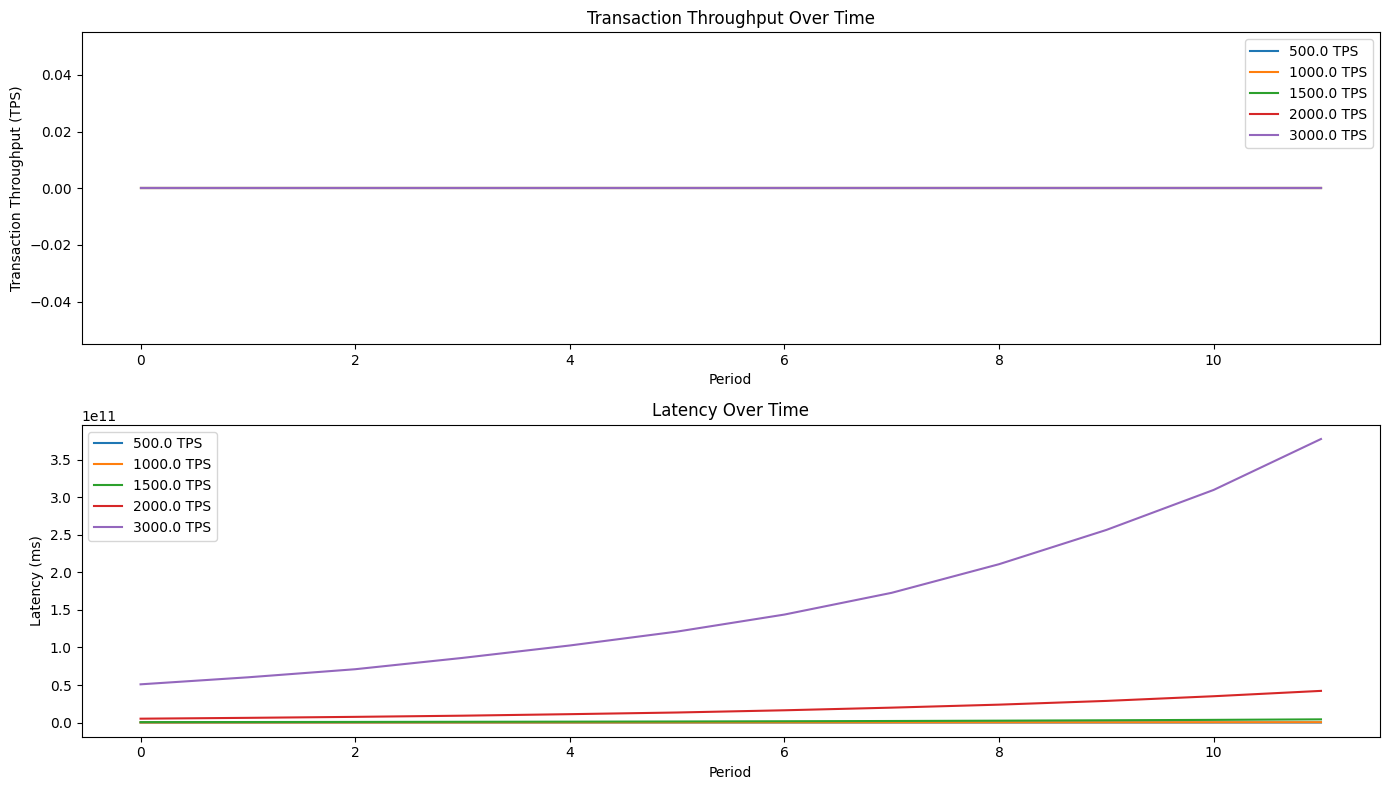

In [5]:
import matplotlib.pyplot as plt

# Plotting Transaction Throughput and Latency Over Time
plt.figure(figsize=(14, 8))

for multiplier, results in simulation_results.items():
    throughput = [result['transaction_throughput'] for result in results]
    latency = [result['latency'] for result in results]
    
    plt.subplot(2, 1, 1)
    plt.plot(range(periods), throughput, label=f'{multiplier * 1000} TPS')
    plt.xlabel('Period')
    plt.ylabel('Transaction Throughput (TPS)')
    plt.title('Transaction Throughput Over Time')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(range(periods), latency, label=f'{multiplier * 1000} TPS')
    plt.xlabel('Period')
    plt.ylabel('Latency (ms)')
    plt.title('Latency Over Time')
    plt.legend()

plt.tight_layout()
plt.show()

